# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [33]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

In [35]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [36]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html, 'html.parser')
table = soup.find(attrs={'class':'table'})

In [37]:
# Extract all rows of data
table_row_data = table.find_all('tr',attrs={"class":"data-row"})

headers = [head.text for head in table.find_all('th')]

for i, header in enumerate(headers):
    print(f"{i}: {header}")


0: id
1: terrestrial_date
2: sol
3: ls
4: month
5: min_temp
6: pressure


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [38]:
def format_row_to_dict(row):
    """Create a dictionary corresponding to the table headers as keys and table row entry
    data as the values."""
    row_entries = [cell.text for cell in row.find_all('td')]
    row_tuple = zip(headers, row_entries)

    return dict(row_tuple)
    
row_list = [format_row_to_dict(table_row) for table_row in table_row_data]   

In [39]:
# Create a Pandas DataFrame 
table_df = pd.DataFrame(row_list)


In [40]:
# Confirm DataFrame was created successfully
table_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [41]:
# Examine data type of each column
table_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [42]:
# Change data types for data analysis

# For non-datetime objects we are going to use the `.astype()` method
to_int = ['id', 'sol', 'ls', 'month']

for col_name in to_int:
    table_df[col_name] = table_df[col_name].astype(int)

to_float = ['min_temp', 'pressure']

for col_name in to_float:
    table_df[col_name] = table_df[col_name].astype(float)

# For datetimes we use the pd.to_datetime() method
table_df['terrestrial_date'] = pd.to_datetime(table_df['terrestrial_date'])

In [43]:
# Confirm type changes were successful by examining data types again
table_df.dtypes 

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [44]:
table_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [45]:
# 1. How many months are there on Mars?
no_months = len(table_df['month'].unique())

print(f"There are {no_months} months on mars.")

There are 12 months on mars.


In [46]:
# 2. How many sols (Martian days) worth of data are there?
no_days = len(table_df['sol'].unique())

print(f"There are {no_days} martian day's worth of data in this set.")

There are 1867 martian day's worth of data in this set.


In [47]:
monthly_temp = table_df.groupby('month', as_index=False)['min_temp'].mean()

monthly_temp.columns = ['month','avg_min_temp']

Text(0, 0.5, 'Average Min Temperature')

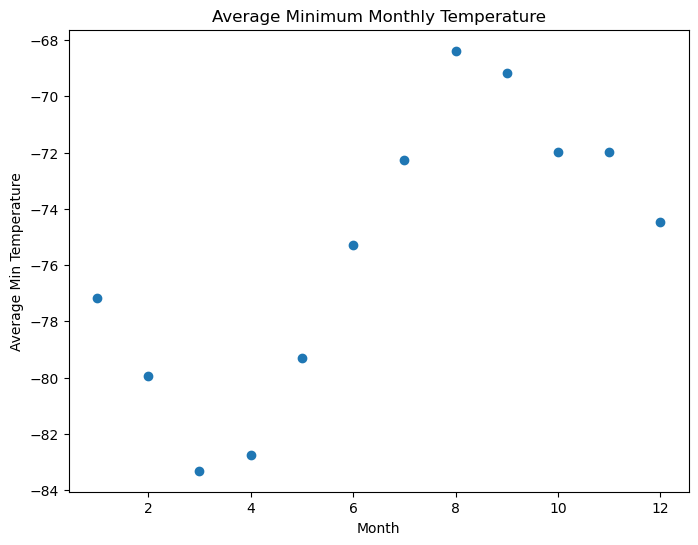

In [48]:
# Plot the average minimum temperature by month
fig, ax = plt.subplots(figsize=(8,6))

# scatter plot
ax.scatter(monthly_temp['month'], monthly_temp['avg_min_temp'])
ax.set_title('Average Minimum Monthly Temperature')
ax.set_xlabel('Month')
ax.set_ylabel('Average Min Temperature')

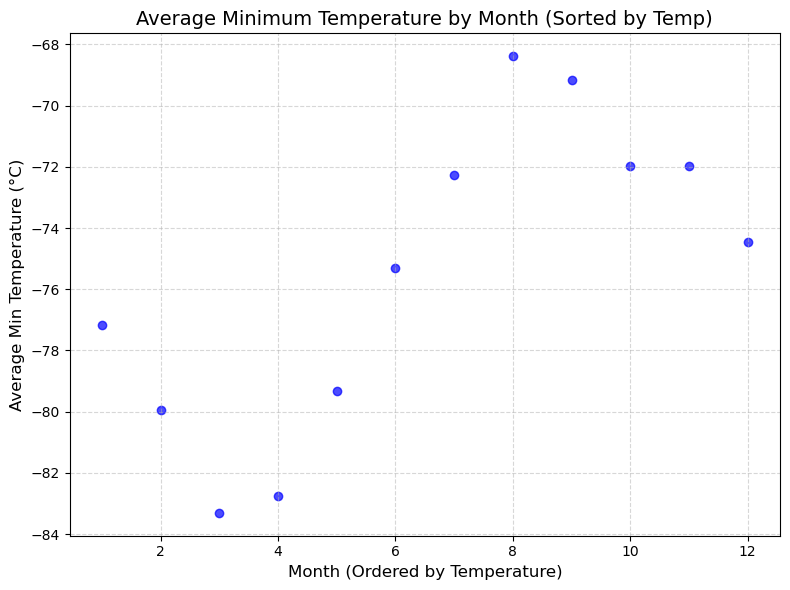

In [49]:

# Sort values by 'avg_min_temp'
monthly_temp_sorted = monthly_temp.sort_values(by=['avg_min_temp'])

# Set the month as a categorical variable with unique months in temperature order
monthly_temp_sorted['month'] = pd.Categorical(
    monthly_temp_sorted['month'],
    categories=monthly_temp_sorted['month'].unique(),
    ordered=True
)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(
    monthly_temp_sorted['month'], 
    monthly_temp_sorted['avg_min_temp'], 
    color='blue', 
    alpha=0.7
)
plt.title("Average Minimum Temperature by Month (Sorted by Temp)", fontsize=14)
plt.xlabel("Month (Ordered by Temperature)", fontsize=12)
plt.ylabel("Average Min Temperature (°C)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [50]:
# 4. What is the average pressure by month?
monthly_pressure = table_df.groupby('month', as_index=False)['pressure'].mean()

monthly_pressure.columns = ['month','avg_pressure']

monthly_pressure

,month,avg_pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


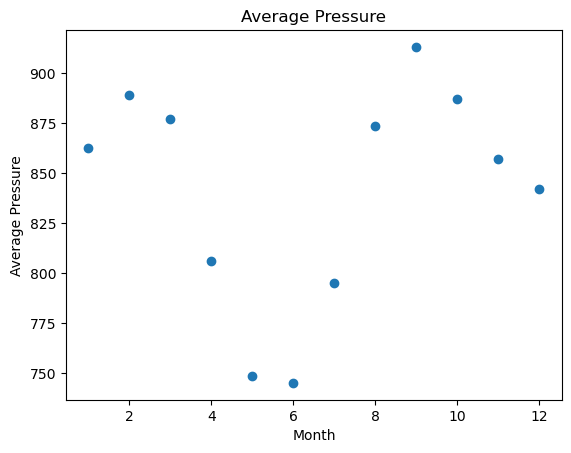

In [56]:
# Plot the average pressure by month
plt.scatter(monthly_pressure['month'], monthly_pressure['avg_pressure'])

plt.title("Average Pressure")
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.show()

In [ ]:
# Identify the lowest and highest pressure 


In [53]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [54]:
# Write the data to a CSV
table_df.to_csv('../Resources/weather_data.csv')

In [55]:
browser.quit()